<a href="https://colab.research.google.com/github/paulhondola/paulhondola/blob/main/BIA_Laborator_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $k$-Nearest neighbors

Let's apply the **$k$-nearest neighbors** algorithm on the `iris` dataset. First, we load the data and construct the train and test splits.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X, y = iris_dataset.data, iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Now, we can use the `KNeighborsClassifier`, with the `n_neighbors` parameter (which specifies the value of $k$) equal to 3, meaning that we do a three-nearest neighbors classification.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

We can apply the fitted classifier to the test set:

In [ ]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

And we can compute the accuracy on the test set:

In [ ]:
clf.score(X_test, y_test)

0.9736842105263158

The accuracy is 97.3%, similar to what we obtained using the linear models.

Now, we can visualize the **decision boundary** of the $k$-nearest neighbors classifiers. In order to facilitate visualization, we will only use the first two features in the `iris` dataset, namely the sepal length and sepal width. We use different values for $k$: 1, 3, 9, 15.

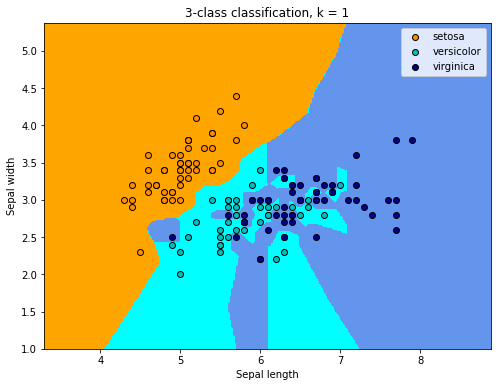

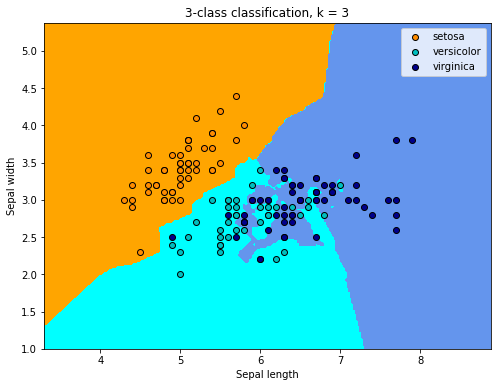

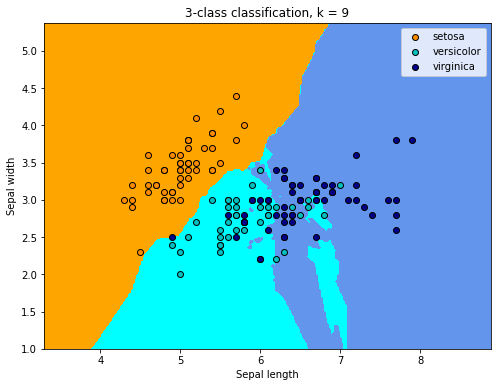

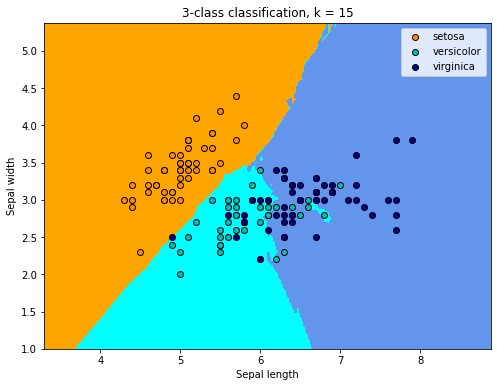

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# We only take the first two features
X = iris_dataset.data[:, :2]
y = iris_dataset.target

h = 0.02  # Step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for n_neighbors in [1, 3, 9, 15]:
    # We create an instance of KNeighborsClassifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    for i in range(3):
      plt.scatter(X[:, 0][y==i], X[:, 1][y==i], c=cmap_bold[i],
                  edgecolors="black", label=iris_dataset.target_names[i])

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-class classification, k = %i" % (n_neighbors))
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.legend()

plt.show()

As we can see in the first figure, using a single neighbor results in a decision
boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to *high model complexity* (as shown in the first figures), and using many neighbors corresponds to *low model complexity* (as shown in the last figures).

Let’s investigate whether we can confirm the connection between model complexity
and generalization that we discussed earlier. We will also do this on the original `iris` dataset. We begin by splitting the dataset into a training and a test set. We evaluate training and test set accuracy with different numbers of neighbors, from 1 to 10. The results are shown in the figure below.

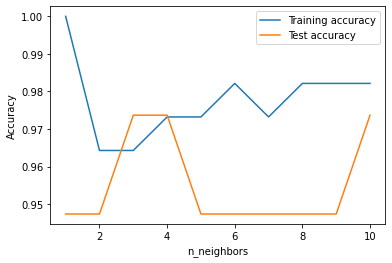

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset.data, iris_dataset.target, stratify=iris_dataset.target, random_state=66)

training_accuracy = []
test_accuracy = []
# Try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # Build and fit the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record test set (generalization) accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

#Linear SVM classification

Let’s build an SVM classifier to distinguish between the setosa and versicolor types in the `iris` dataset, based only on the petal length and petal width features. First, let’s create the data:

In [ ]:
X = iris_dataset["data"][:, (2, 3)]  # petal length, petal width
y = iris_dataset["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

Now, let's build the **linear hard margin SVM classifier** using the `SVC` class with the `linear` kernel. Notice that, for the hard margin SVM classifier, the $C$ parameter is $+\infty$.

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

We can plot the data, the **maximum margin hyperplane**, i.e., the *decision boundary* (continuous line in the figure below), the **margin** (dotted lines in the figure below), and the **support vectors** (the circled points in the figure below). Notice that we can access the $\boldsymbol{w}$ parameter by the `coef_` attribute, the $w_{0}$ parameter by the `intercept_` attribute, and the support vectors by the `support_vectors_` attribute.

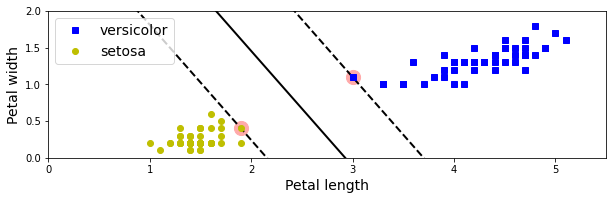

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    margin_up = decision_boundary + margin
    margin_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=200, facecolors='#FFAAAA') #Draw support vectors
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #Draw maximum margin hyperplane
    plt.plot(x0, margin_up, "k--", linewidth=2) #Draw up margin
    plt.plot(x0, margin_down, "k--", linewidth=2) #Draw down margin

plt.figure(figsize=(10,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend(loc="upper left", fontsize=14)
plt.show()

SVMs are sensitive to the feature scales, as we can see below: in the left plot, the vertical scale is much larger than the horizontal scale, so the widest possible margin is close to horizontal. After feature scaling (e.g., using `scikit-learn`’s `StandardScaler`), the decision boundary in the right plot looks much better.

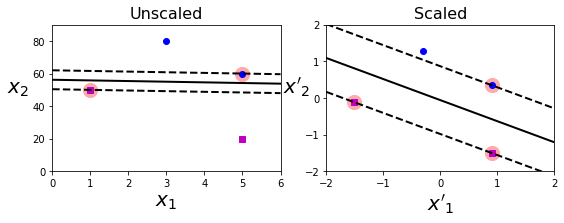

In [ ]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_1$", fontsize=20)
plt.ylabel("$x_2$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_1$", fontsize=20)
plt.ylabel("$x'_2$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

Next, we will build the **linear soft margin SVM classifier**, this time using the `LinearSVC` class with the `hinge` loss. Again we will only use the petal length and petal width features to distinguish between the setosa and versicolor types in the `iris` dataset. For the soft margin SVM classifier, the $C$ parameter is finite. For a small $C$, we allow more margin violations, whereas for a bigger $C$, we allow less margin violations. We use $C=0.1$ and $C=1$, respectively.

In [ ]:
from sklearn.svm import LinearSVC

X = iris_dataset["data"][:, (2, 3)]  # petal length, petal width
y = iris_dataset["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf1 = LinearSVC(C=0.1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=1, loss="hinge", random_state=42)

svm_clf1.fit(X, y)
svm_clf2.fit(X, y)

LinearSVC(C=1, loss='hinge', random_state=42)

For the `LinearSVC` class, the support vectors are not computed automatically, so we have to do it ourselves. The support vectors are the examples from the dataset `X` which are inside the margin, i.e., $y(\boldsymbol{w}^{\top}\boldsymbol{x}+w_{0})\leq 1$. Note that we should have $y=+1$ for the positive class and $y=-1$ for the negative class.

In [ ]:
w1 = svm_clf1.coef_[0]
b1 = svm_clf1.intercept_[0]
w2 = svm_clf2.coef_[0]
b2 = svm_clf2.intercept_[0]

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) <= 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) <= 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Finally, we can plot the data, the decision boundary (continuous line in the figure below), the margin (dotted lines in the figure below), and the support vectors (the circled points in the figure below).

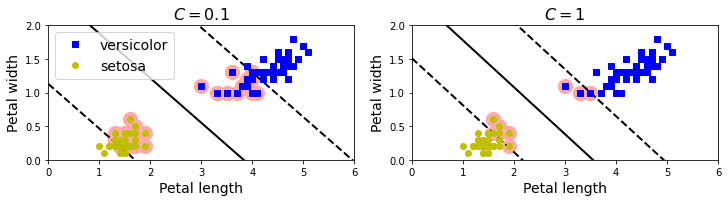

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), constrained_layout=True)

plt.sca(axes[0])
plot_svc_decision_boundary(svm_clf1, 0, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([0, 6, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf2, 0, 6)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([0, 6, 0, 2])

plt.show()

We can see that for $C=0.1$ there are more support vectors than for $C=1$, because the first classifier allows for more margin violations than the second, and indeed we can see that it has a larger margin.

Now, let's use **stochastic gradient descent** to implement the linear SVM classifier. The dataset will be the same as before. We will use the `SGDClassifier` class with the `loss` parameter set to `"hinge"`. We use $\ell_{2}$ regularization, with the $\lambda$ hyperparameter equal to 0.1, specified by the `alpha` parameter of the `SGDClassifier` class. The $C$ parameter in the SVM classifier corresponds to $1/\lambda$. The SGD classifier is trained for 1000 epochs, specified by the `max_iter` parameter.

In [ ]:
X = iris_dataset["data"][:, (2, 3)]  # petal length, petal width
y = iris_dataset["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor].reshape(-1, 1)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", penalty="l2", alpha=0.1, max_iter=1000, random_state=42)
sgd_clf.fit(X, y.ravel())

SGDClassifier(alpha=0.1, random_state=42)

We also have to compute the support vectors ourselves. We again plot the data, the decision boundary (continuous line in the figure below), the margin (dotted lines in the figure below), and the support vectors (the circled points in the figure below).

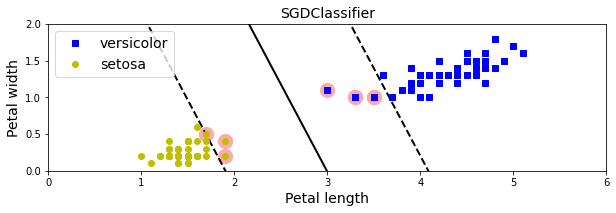

In [ ]:
# Compute the support vectors
n = len(X)
t = y * 2 - 1  # -1 if y==0, +1 if y==1
X_b = np.c_[np.ones((n, 1)), X]  # Add bias input x0=1
sgd_w = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
support_vectors_idx = ((t * X_b).dot(sgd_w) <= 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]

yr = y.ravel()
plt.figure(figsize=(10,2.7))
plot_svc_decision_boundary(sgd_clf, 0, 6)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "bs", label="versicolor")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "yo", label="setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([0, 6, 0, 2])

plt.show()

#Nonlinear SVM classification

One approach to handling nonlinear datasets is to add more features, such as polynomial features. In some cases, this can result in a linearly separable dataset. Consider the left plot in the figure below: it represents a simple dataset with just one feature, $x_{1}$. This dataset is not linearly separable, as we can see. But if we add a second feature $x_{2} = (x_{1})^{2}$, the resulting 2D dataset is perfectly linearly separable.

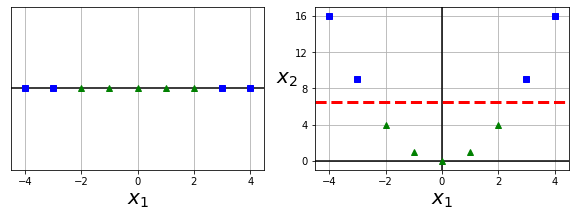

In [ ]:
X_1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X_2D = np.c_[X_1D, X_1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X_1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X_1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X_2D[:, 0][y==0], X_2D[:, 1][y==0], "bs")
plt.plot(X_2D[:, 0][y==1], X_2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.show()

Let’s test this on the `moons` dataset: this is a toy dataset for binary classification in which the data points are shaped as two interleaving half circles (as can be seen in the figure below). We can generate this dataset using the `make_moons()` method:

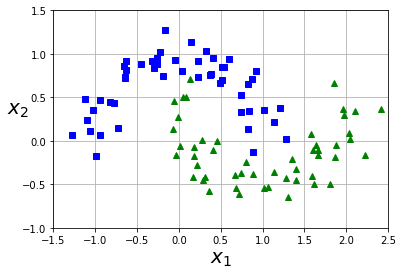

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Now, we create a `Pipeline` containing a `PolynomialFeatures` transform with degree $3$, followed by a `StandardScaler` and a `LinearSVC`.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

We can now plot the decision boundary of the linear SVM classifier, which is the divide between where the algorithm assigns class $0$ versus where it assigns class $1$.

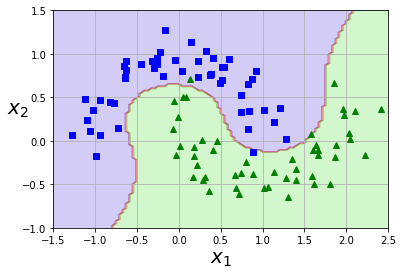

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Fortunately, when using SVMs, we can apply the **kernel trick**. The kernel trick makes it possible to get the same result as if we had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because we don’t actually add any features. This trick is implemented by the `SVC` class, using the `kernel="poly"` parameter. Let’s test it on the `moons` dataset:

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

This code trains an SVM classifier using a third-degree polynomial kernel, specified by the `degree` parameter of the `SVC` class. It is represented on the left in the figure below. On the right is another SVM classifier using a 10th-degree polynomial kernel. Obviously, if our model is overfitting, we might want to reduce the polynomial degree. Conversely, if it is underfitting, we can try increasing it. The hyperparameter `coef0` controls how much the model is influenced by high-degree polynomials versus low-degree polynomials. It corresponds to the $\beta$ hyperparameter in the polynomial kernel: $K(\boldsymbol{a}, \boldsymbol{b}) = (\gamma\boldsymbol{a}^{\top}\boldsymbol{b} + \beta)^{p}$.

In [ ]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

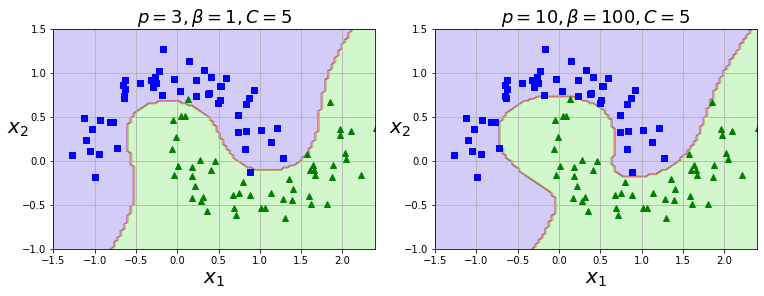

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), constrained_layout=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$p=3, \beta=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$p=10, \beta=100, C=5$", fontsize=18)

plt.show()

Now, let’s try the `SVC` class with the Gaussian RBF kernel: $K(\boldsymbol{a},\boldsymbol{b})=\exp\left(-\gamma||\boldsymbol{a}-\boldsymbol{b}||_{2}^{2}\right)$, specified using the `kernel="rbf"` parameter. It is controlled by the $\gamma$ hyperparameter, which is specified as `gamma` in the `SVC` class.

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This model is represented at the bottom left in the figure below. The other plots show models trained with different values of the hyperparameters $\gamma$ and $C$. Increasing $\gamma$ makes the bell-shaped curve narrower (see the lefthand plots in the figure below). As a result, each instance’s range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small $\gamma$ value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother. So $\gamma$ acts like a regularization hyperparameter: if our model is overfitting, we should reduce it; if it is underfitting, we should increase it (similar to the $C$ hyperparameter).

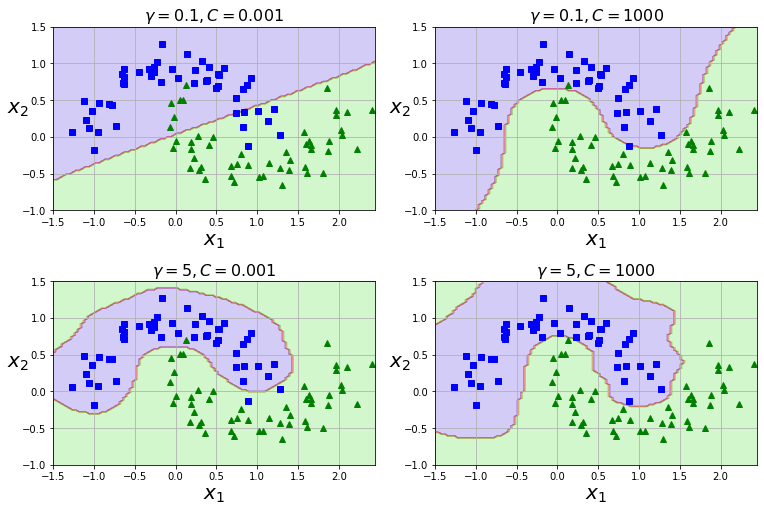

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), constrained_layout=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

plt.show()

#SVM regression

The SVM algorithm is versatile: not only does it support linear and nonlinear classification, but it also supports linear and nonlinear regression. To use SVMs for regression instead of classification, the trick is to reverse the objective: instead of trying to fit the largest possible margin between two classes while limiting margin violations, SVM regression tries to fit as many instances as possible inside the margin, while limiting margin violations (i.e., instances outside the margin). The width of the margin is controlled by a hyperparameter, $\epsilon$. The figure below shows two linear SVM regression models trained on some random linear data, one with a large margin ($\epsilon=1.5$) and the other with a small margin ($\epsilon = 0.5$).

In [ ]:
np.random.seed(42)
n = 50
X = 2 * np.random.rand(n, 1)
y = (4 + 3 * X + np.random.randn(n, 1)).ravel()

In [ ]:
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

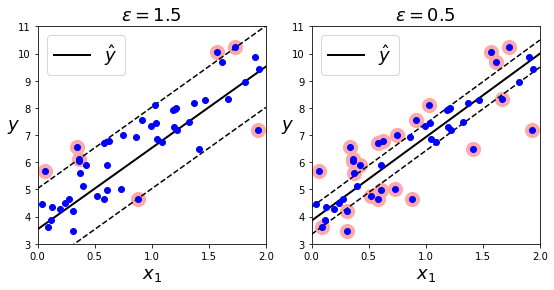

In [ ]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=200, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4))
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()

To tackle nonlinear regression tasks, we can use a kernelized SVM model. The figure below shows SVM regression on a random quadratic training set, using a
second-degree polynomial kernel. There is little regularization in the left plot (i.e., a large $C$ value), and much more regularization in the right plot (i.e., a small $C$ value). We use `scikit-learn`’s `SVR` class, which supports the kernel trick, with `kernel="poly"`. The `SVR` class is the regression equivalent of the `SVC` class, and the `LinearSVR` class is the regression equivalent of the `LinearSVC` class. The `LinearSVR` class scales linearly with the size of the training set (just like the `LinearSVC` class), while the `SVR` class gets much too slow when the training set grows large (just like the `SVC` class).

In [ ]:
np.random.seed(42)
n = 100
X = 2 * np.random.rand(n, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(n, 1)/10).ravel()

In [ ]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

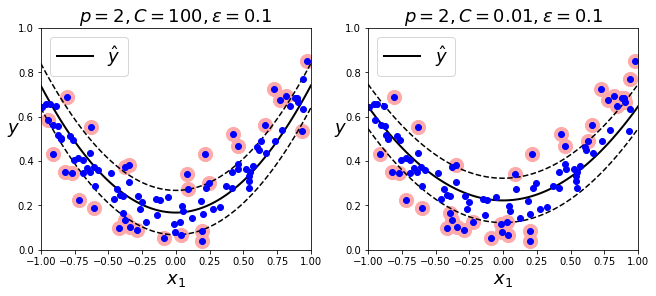

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), constrained_layout=True)
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$p={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$p={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()